#Calculation of the Soil Water Index (SWI)

The Soil Water Index (SWI), a method to estimate root zone soil moisture, can be calculated from Surface Soil Moisture (SSM) using an exponential filter.
For more details see this publication of [C. Albergel et al.](http://www.hydrol-earth-syst-sci.net/12/1323/2008/hess-12-1323-2008.html)

##1. Introduction: From surface soil moisture to root zone soil moisture

Soil moisture measurements from ESCAT represent the water content of the first few centimetres of the soil profile,
because the penetration depth of C-band microwaves is limited to about 0.5 cm to 2 cm. For different applications,
such as numerical weather prediction, hydrological or vegetation studies, a key input variable is the root zone soil
moisture.
<br><br>Root zone soil moisture constitutes the water content available for vegetation and is therefore an important
driver for evapotranspiration, which strongly influences the energy flux between the land surface and the atmosphere.
The relationship between surface soil moisture and root zone soil moisture is given through the process of
infiltration. A large number of parameters like soil characteristics (soil texture and structure), vegetation coverage, soil temperature and the present water content control the infiltration rate of water into the deeper soil layers. 
<br><br>Because of the lack of information about this parameters on a global scale, Wagner et al. (1999) developed an empirical method for estimating root zone soil moisture from remotely sensed surface soil moisture measurements. The empirical method is based on a two-layer water balance model, in which the first layer represents the C-band microwave
accessible top-soil layer and the second layer is treated as a reservoir coupled with the atmosphere via the first layer
exclusively. In view of the fact that the first layer is directly connected to the atmosphere, the water content in the
surface soil layer is temporally highly dynamic, due to processes such as precipitation, evapotranspiration and runoff.
<br><br>On the other hand, the temporal variability of the water content within the reservoir, the second layer, is supposed to decrease with increasing reservoir depth as a result of a slow exchange with the surface layer. As a consequence, the
water content stored within the reservoir is controlled by the soil moisture conditions in the surface layer and thus a
function of preceding precipitation events. Accordingly, the following water balance equation for the reservoir is
proposed under the assumption that the water flux between the two soil layers is proportional to the difference of the
volumetric water content in the surface layer and the reservoir (Ceballos et al., 2005; Wagner et al., 1999).
<br><br>
$$L\frac{d\Theta(t)}{dt}\;=\;C\;\cdot\;[\Theta_S(t)\;-\;\Theta(t)]$$
<br><br>
In this water balance equation for the reservoir, the volumetric water content of the reservoir is denoted by
$\Theta$, the water content of the surface layer is $\Theta_S$, $t$ is the time, $L$ is the depth of the reservoir layer and $C$ is a pseudodiffusivity coefficient incorporating all soil properties. If $C$ is assumed to be constant and $T=\frac{L}{C}$, the differential water balance equation can be solved as follows:
<br><br>
$$\Theta(t)\;=\;\frac{1}{T}\int_{-\infty}^t\!\Theta_S(\tau)\;\cdot\;e^{(-\frac{t-\tau}{T})}\,d\tau$$
<br><br>
The parameter $T$ is referred to as characteristic time length, which increases with the reservoir depth $L$ and decreases with the pseudo diffusivity coefficient $C$. As explained by the water balance model equation above, **the water
content of the reservoir $\Theta$ is fully explained by past dynamics of the surface soil moisture content $\Theta_S$**. <br><br>
Furthermore, **more recent events have a stronger impact on the reservoir water content than events from the distant past as a result of the exponential weighting function**. The water balance model is a useful general concept for estimating root zone soil moisture from surface soil moisture measurements, but it does not consider processes like transpiration or
evaporation. However, ESCAT provides measurements at irregular temporal intervals. Consequently, the continuous
formulation of the model was replaced by its discrete counterpart defined as the **soil water index (SWI)**.
Taking into account the before mentioned considerations, the SWI for a defined characteristic time length $T$ can be
calculated as follows:
<br><br>
$$SWI(t)\;=\;\frac{\sum_i{sm(t)\;\cdot\;e^{(-\frac{t-t_i}{T})}}}{\sum_i{e^{(-\frac{t-t_i}{T})}}}\;\;\;for\;t_i\;\le\;t$$
<br><br>

##2. Code

The following example shows how to calculate the SWI for two $T$ values from ASCAT H25 SSM.

In [29]:
%matplotlib inline

In [21]:
import os

import matplotlib.pyplot as plt

from pytesmo.time_series.filters import exp_filter
import pytesmo.io.sat.ascat as ascat


ascat_folder = os.path.join('/media', 'sf_R', 'Datapool_processed',
                            'WARP', 'WARP5.5', 'IRMA0_WARP5.5_P2',
                            'R1', '080_ssm', 'netcdf')
ascat_grid_folder = os.path.join('/media', 'sf_R',
                                 'Datapool_processed', 'WARP',
                                 'ancillary', 'warp5_grid')

First, required modules are imported and paths are set.
<br><code>ascat_folder</code> is the path in which the data files are located, e.g. TUW_METOP_ASCAT_WARP55R12_0600.nc.
<br><code>ascat_grid_folder</code> is the path in which the file TUW_WARP5_grid_info_2_1.nc is located.
<br>Next, the ASCAT SSM reader is initialized with the above defined paths.

In [12]:
ascat_SSM_reader = ascat.AscatH25_SSM(ascat_folder, ascat_grid_folder,
                                      include_in_df=['sm', 'sm_noise',
                                                     'ssf', 'proc_flag'])

The time series is read for a specific grid point (gpi), here gpi 2425877, which corresponds to the location at 48.172 N 16.302 E (Vienna).
<br><br>
In the resulting plot, you can see very well which information you can get from an ASCAT time series (not only soil moisture but also noise estimates, frozen probabilities, snow probabilities, ...) and in which ranges these parameter values are lying:
<br>

|Name       |Long Name|Unit|Valid Range|Meanings|
|-----------|---------|----|-----------|--------|
|sm         |Soil Moisture |[%]|1-100||
|sm_noise   |Soil Moisture Noise|[%]|1-100||
|ssf        |Surface State Flag  ||0, 1, 2, 3, 4|unknown, unfrozen, temporary frozen, melting water on the surface, permanent ice|
|frozen_prob|Historic probability of frozen land|[%]|1-100||
|snow_prob  |Historic probability of snow cover|[%]|1-100||
|proc_flag  |Processing Flag||0, 1, 2, 4, 8, 16|default, <br>soil_moisture_set_to_0_since_it_was_between_0_and_minus_50,<br> soil_moisture_set_to_100_it_was_between_100_and_150,<br>soil_moisture_set_to_NaN_it_was_below_minus_50,<br> soil_moisture_set_to_NaN_it_was_above_150,<br>normalised_backscatter_is_out_of_limits_or_dry_wet_reference_is_NaN|

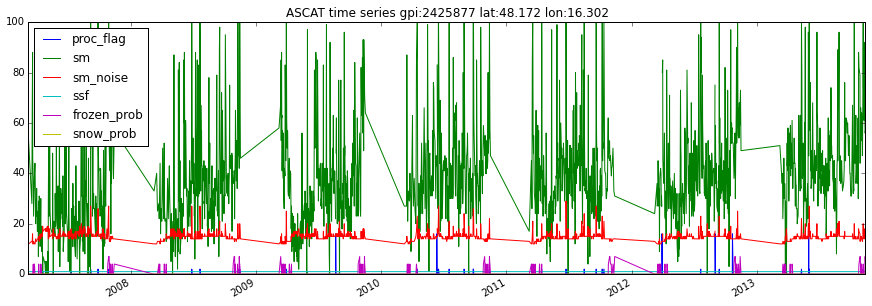

In [28]:
gpi = 2425877
# You can compare different gpis just by changing the gpi value above.
# Remember to hit Shift+Enter to store the new value and run the code again.

ascat_ts = ascat_SSM_reader.read_ssm(gpi, mask_ssf=True, mask_frozen_prob=10,
                                     mask_snow_prob=10)

ascat_ts.plot()
plt.show()

Next, all NaN values are dropped and the SWI for two characteristic time lengths $T$ is calculated.
<br>Finally, the results are plotted.

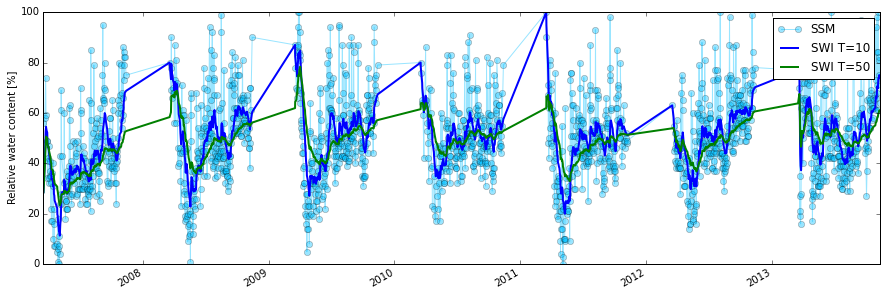

In [26]:
# Drop NA measurements (Return object with labels on given 
# axis omitted where alternately any or all of the data are missing)
ascat_sm_ts = ascat_ts.data[['sm', 'sm_noise']].dropna()

# Get julian dates of time series
jd = ascat_sm_ts.index.to_julian_date().get_values()

# Calculate SWI with characteristic time lengths T=10 and T=50
ascat_sm_ts['swi_t10'] = exp_filter(ascat_sm_ts['sm'].values, jd, ctime=10)
ascat_sm_ts['swi_t50'] = exp_filter(ascat_sm_ts['sm'].values, jd, ctime=50)

# Plot results
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ascat_sm_ts['sm'].plot(ax=ax, alpha=0.4, marker='o',color='#00bfff', label='SSM')
ascat_sm_ts['swi_t10'].plot(ax=ax, lw=2,label='SWI T=10')
ascat_sm_ts['swi_t50'].plot(ax=ax, lw=2,label='SWI T=50')
plt.ylabel('Relative water content [%]')
plt.legend()
plt.show()

You can try out and compare the results for different grid points. Find the corresponding gpi values using our [Grid Point Locator](http://rs.geo.tuwien.ac.at/dv/dgg/) (choose "Grid: WARP").